### Regression Analysis

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load cleaned data
df = pd.read_csv(r'C:\Users\kiyo3001\Desktop\Personal\GITHUB\New folder (2)\cleaned_retail_data.csv')
df.head()

,Age,Gender,Country,City,Session_Duration_Avg,Pages_Per_Session,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Email_Open_Rate,Social_Media_Engagement_Score,Product_Reviews_Written,Customer_Service_Calls,Total_Purchases
0,43.0,Male,France,Marseille,27.4,6.000000,20.8,14.0,1.386294,17.9,16.3,1.609438,9.0,1.194706
1,36.0,Male,UK,Manchester,42.7,10.300000,23.3,15.0,0.693147,42.8,28.0,1.386294,7.0,1.391388
2,45.0,Female,Canada,Vancouver,24.8,1.600000,8.8,10.0,0.693147,0.0,27.5,0.693147,4.0,1.197714
3,56.0,Female,USA,New York,38.4,14.800000,31.0,10.0,2.302585,41.4,78.8,1.791759,2.0,1.327761
4,35.0,Male,India,Delhi,51.4,8.804691,50.4,29.0,2.302585,37.9,78.8,2.484907,1.0,1.506640


In [ ]:
# check for missing values in Target Variable
df['Total_Purchases'].isna().sum()


np.int64(38)

In [ ]:
# fill missing values in Target Variable with 0
df['Total_Purchases'] = df['Total_Purchases'].fillna(0)


In [ ]:
# define features and target variable
features = [
    'Age', 'Gender', 'Country', 'City',
    'Session_Duration_Avg', 'Pages_Per_Session',
    'Mobile_App_Usage', 'Login_Frequency',
    'Wishlist_Items', 'Email_Open_Rate',
    'Social_Media_Engagement_Score',
    'Product_Reviews_Written',
    'Customer_Service_Calls']

target = 'Total_Purchases'

x = df[features]
y = df[target]

In [ ]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
# check the sizes of the splits
len(x_train), len(x_test), len(y_train), len(y_test)

(40000, 10000, 40000, 10000)

In [103]:
x_train

,Age,Gender,Country,City,Session_Duration_Avg,Pages_Per_Session,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Email_Open_Rate,Social_Media_Engagement_Score,Product_Reviews_Written,Customer_Service_Calls
39087,25.0,Female,Canada,Vancouver,49.100000,17.100000,37.800000,19.0,2.197225,52.1,53.3,0.693147,2.0
30893,33.0,Female,Canada,Ottawa,33.700000,11.000000,29.300000,16.0,1.609438,36.6,33.5,1.098612,6.0
45278,32.0,Female,India,Delhi,18.400000,1.000000,17.200000,4.0,0.693147,0.2,8.0,1.098612,10.0
16398,48.0,Male,UK,Glasgow,45.500000,15.900000,29.200000,20.0,2.302585,49.6,28.0,1.945910,3.0
13653,35.0,Male,USA,Phoenix,18.700000,3.100000,26.300000,10.0,0.000000,25.2,12.5,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,30.0,Female,USA,Phoenix,39.700000,8.732207,29.300000,15.0,2.302585,20.5,62.5,0.693147,2.0
44732,29.0,Female,Canada,Vancouver,11.800000,1.300000,19.329633,0.0,1.609438,0.0,0.0,0.000000,7.0
38158,32.0,Female,France,Marseille,41.700000,10.300000,19.486769,9.0,1.609438,37.2,60.7,0.693147,5.0
860,40.0,Female,UK,Leeds,27.627105,10.100000,19.321702,6.0,1.098612,11.1,52.6,1.609438,10.0


In [ ]:
# one-hot encode categorical variables
x_train_enc = pd.get_dummies(x_train, columns = ['Gender', 'Country', 'City'], drop_first=True, dtype=int)
x_test_enc = pd.get_dummies(x_test, columns = ['Gender', 'Country', 'City'], drop_first=True, dtype=int)

x_test_enc = x_test_enc.reindex(columns=x_train_enc.columns, fill_value=0)

In [ ]:
# show encoded training data
x_train_enc.head()

,Age,Session_Duration_Avg,Pages_Per_Session,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Email_Open_Rate,Social_Media_Engagement_Score,Product_Reviews_Written,Customer_Service_Calls,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
39087,25.0,49.1,17.1,37.8,19.0,2.197225,52.1,53.3,0.693147,2.0,...,0,0,0,0,0,0,0,0,1,0
30893,33.0,33.7,11.0,29.3,16.0,1.609438,36.6,33.5,1.098612,6.0,...,1,0,0,0,0,0,0,0,0,0
45278,32.0,18.4,1.0,17.2,4.0,0.693147,0.2,8.0,1.098612,10.0,...,0,0,0,0,0,0,0,0,0,0
16398,48.0,45.5,15.9,29.2,20.0,2.302585,49.6,28.0,1.945910,3.0,...,0,0,0,0,0,0,0,0,0,0
13653,35.0,18.7,3.1,26.3,10.0,0.000000,25.2,12.5,0.000000,6.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# standardize numerical features
scaler = StandardScaler()
num_cols = [
    'Age', 'Session_Duration_Avg', 'Pages_Per_Session',
    'Mobile_App_Usage', 'Login_Frequency',
    'Wishlist_Items', 'Email_Open_Rate',
    'Social_Media_Engagement_Score',
    'Product_Reviews_Written',
    'Customer_Service_Calls'
]

x_train_enc[num_cols] = scaler.fit_transform(x_train_enc[num_cols])
x_test_enc[num_cols] = scaler.transform(x_test_enc[num_cols])

In [ ]:
# check the sizes of the splits
len(x_train), len(x_test), len(y_train), len(y_test)

(40000, 10000, 40000, 10000)

In [ ]:
# show encoded training data
x_train_enc.head()

,Age,Session_Duration_Avg,Pages_Per_Session,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Email_Open_Rate,Social_Media_Engagement_Score,Product_Reviews_Written,Customer_Service_Calls,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
39087,-1.141314,2.043326,2.286321,2.066089,0.952038,1.108562,2.269912,1.276410,-0.732395,-1.375299,...,0,0,0,0,0,0,0,0,1,0
30893,-0.424484,0.575691,0.620697,1.113361,0.565614,0.202225,1.143147,0.233589,-0.083643,0.119978,...,1,0,0,0,0,0,0,0,0,0
45278,-0.514088,-0.882414,-2.109833,-0.242876,-0.980083,-1.210650,-1.502933,-1.109438,-0.083643,1.615255,...,0,0,0,0,0,0,0,0,0,0
16398,0.919572,1.700242,1.958657,1.102152,1.080846,1.271023,2.088176,-0.056083,1.272050,-1.001479,...,0,0,0,0,0,0,0,0,0,0
13653,-0.245277,-0.853824,-1.536422,0.777103,-0.207235,-2.279448,0.314430,-0.872433,-1.841445,0.119978,...,0,0,0,1,0,0,0,0,0,0


In [109]:
x_test_enc.head()

,Age,Session_Duration_Avg,Pages_Per_Session,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Email_Open_Rate,Social_Media_Engagement_Score,Product_Reviews_Written,Customer_Service_Calls,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
33553,-0.424484,0.009825,-0.608041,-1.049894,-0.851275,0.483355,-1.517472,-1.293775,0.376654,-0.253841,...,0,0,0,0,0,0,0,0,0,0
9427,-0.693296,1.299978,1.057582,1.259072,0.823230,0.202225,0.765136,-0.377356,0.733688,-1.001479,...,0,0,0,0,0,0,0,0,0,0
199,-1.230918,-1.215967,-0.908400,-0.724845,-0.980083,-2.279448,-0.928646,-0.287821,-0.083643,0.493797,...,0,0,0,1,0,0,0,0,0,0
12447,-1.320522,2.500771,0.893751,1.595329,2.240119,1.675575,1.761051,2.619436,0.376654,-1.001479,...,0,0,0,0,0,0,0,0,1,0
39489,1.277987,-0.815703,-0.799178,-1.005059,-0.464851,-0.585443,-1.517472,-0.888233,0.376654,0.119978,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train_enc, y_train)

lin_pred = linear_model.predict(x_test_enc)

In [ ]:
# train a ridge regression model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_trans, y_train)

ridge_pred = ridge_model.predict(x_test_trans)


In [ ]:
# train a lasso regression model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(x_train_trans, y_train)

lasso_pred = lasso_model.predict(x_test_trans)


In [ ]:
# evaluate model performance
def evaluate(y_true, y_pred, name):
    print(
        name,
        "R2:", r2_score(y_true, y_pred),
        "RMSE:", np.sqrt(mean_squared_error(y_true, y_pred))
    )

evaluate(y_test, lin_pred, "Linear")
evaluate(y_test, ridge_pred, "Ridge")
evaluate(y_test, lasso_pred, "Lasso")


Linear R2: 0.5306594551236403 RMSE: 0.10117078439427032
Ridge R2: 0.5306660525352385 RMSE: 0.10117007332460112
Lasso R2: 0.5229505541358057 RMSE: 0.1019982635892196


In [ ]:
# analyze residuals for linear regression
residuals = y_test - lin_pred
print("Mean Residual:", residuals.mean())


Mean Residual: -0.0009103586459688486


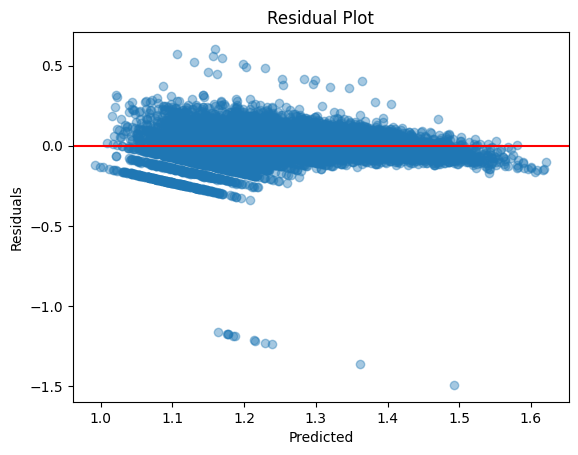

In [ ]:
# plot residuals
plt.scatter(lin_pred, residuals, alpha=0.4)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
# additional residual analysis
import numpy as np

print("Max Error:", np.abs(residuals).max())
print("Mean Absolute Error:", np.abs(residuals).mean())


Max Error: 1.492451688569503
Mean Absolute Error: 0.0706595510004439


In [ ]:
# check prediction range
print("Pred min:", lin_pred.min())
print("Pred max:", lin_pred.max())

Pred min: 0.9925063498493856
Pred max: 1.6215842583318993


In [ ]:
# create a DataFrame to compare actual vs predicted
import pandas as pd

result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lin_pred,
    'Difference': y_test - lin_pred
})

result.head()


,Actual,Predicted,Difference
33553,1.124748,1.204553,-0.079805
9427,1.343703,1.363227,-0.019524
199,1.248441,1.116162,0.132279
12447,1.439569,1.476926,-0.037358
39489,1.162283,1.161088,0.001195


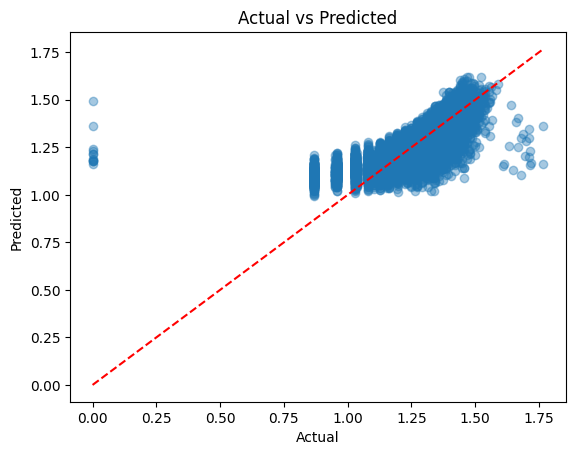

In [ ]:
# plot actual vs predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


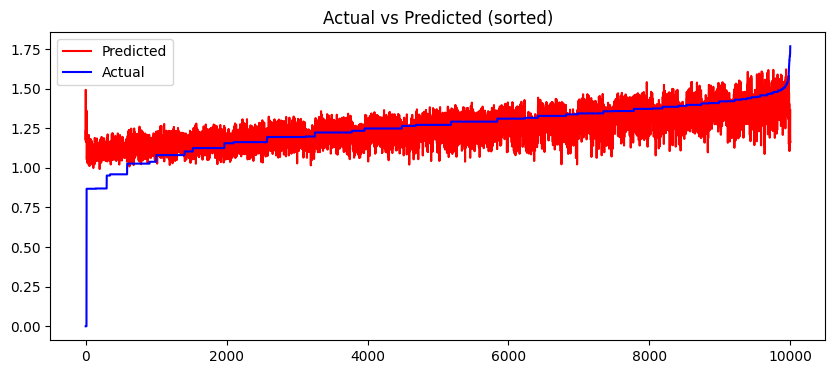

In [ ]:
# plot sorted actual vs predicted

sorted_idx = y_test.argsort()

plt.figure(figsize=(10,4))
plt.plot(lin_pred[sorted_idx], label='Predicted', color='red')
plt.plot(y_test.iloc[sorted_idx].values, label='Actual', color='blue')
plt.legend()
plt.title("Actual vs Predicted (sorted)")
plt.show()



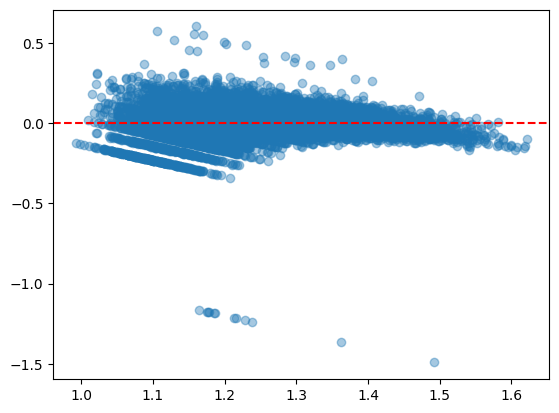

In [ ]:
# plot residuals
residuals = y_test - lin_pred
plt.scatter(lin_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')


In [ ]:
# create a DataFrame for new data points to check predictions
import pandas as pd

new_rows = pd.DataFrame([
    {
        "Age": 43, "Gender": "Male", "Country": "France", "City": "Marseille",
        "Session_Duration_Avg": 27.4, "Pages_Per_Session": 6,
        "Mobile_App_Usage": 20.8, "Login_Frequency": 14,
        "Wishlist_Items": 1.3862943611198906, "Email_Open_Rate": 17.9,
        "Social_Media_Engagement_Score": 16.3, "Product_Reviews_Written": 1.6094379124341003,
        "Customer_Service_Calls": 9
    },
    {
        "Age": 36, "Gender": "Male", "Country": "UK", "City": "Manchester",
        "Session_Duration_Avg": 42.7, "Pages_Per_Session": 10.3,
        "Mobile_App_Usage": 23.3, "Login_Frequency": 15,
        "Wishlist_Items": 0.6931471805599453, "Email_Open_Rate": 42.8,
        "Social_Media_Engagement_Score": 28.0, "Product_Reviews_Written": 1.3862943611198906,
        "Customer_Service_Calls": 7
    },
    {
        "Age": 45, "Gender": "Female", "Country": "Canada", "City": "Vancouver",
        "Session_Duration_Avg": 24.8, "Pages_Per_Session": 1.6,
        "Mobile_App_Usage": 8.8, "Login_Frequency": 10,
        "Wishlist_Items": 0.6931471805599453, "Email_Open_Rate": 0.0,
        "Social_Media_Engagement_Score": 27.5, "Product_Reviews_Written": 0.6931471805599453,
        "Customer_Service_Calls": 4
    },
    {
        "Age": 56, "Gender": "Female", "Country": "USA", "City": "New York",
        "Session_Duration_Avg": 38.4, "Pages_Per_Session": 14.8,
        "Mobile_App_Usage": 31.0, "Login_Frequency": 10,
        "Wishlist_Items": 2.302585092994046, "Email_Open_Rate": 41.4,
        "Social_Media_Engagement_Score": 78.8, "Product_Reviews_Written": 1.791759469228055,
        "Customer_Service_Calls": 2
    },
    {
        "Age": 35, "Gender": "Male", "Country": "India", "City": "Delhi",
        "Session_Duration_Avg": 51.4, "Pages_Per_Session": 8.804691283292978,
        "Mobile_App_Usage": 50.4, "Login_Frequency": 29,
        "Wishlist_Items": 2.302585092994046, "Email_Open_Rate": 37.9,
        "Social_Media_Engagement_Score": 78.8, "Product_Reviews_Written": 2.4849066497880004,
        "Customer_Service_Calls": 1
    },
    {
        "Age": 35, "Gender": "Male", "Country": "Japan", "City": "Tokyo",
        "Session_Duration_Avg": 21.9, "Pages_Per_Session": 6.9,
        "Mobile_App_Usage": 11.2, "Login_Frequency": 6,
        "Wishlist_Items": 0.0, "Email_Open_Rate": 16.0,
        "Social_Media_Engagement_Score": 14.3, "Product_Reviews_Written": 1.0986122886681098,
        "Customer_Service_Calls": 8
    },
    {
        "Age": 56, "Gender": "Male", "Country": "Germany", "City": "Berlin",
        "Session_Duration_Avg": 46.4, "Pages_Per_Session": 13.9,
        "Mobile_App_Usage": 42.9, "Login_Frequency": 24,
        "Wishlist_Items": 1.791759469228055, "Email_Open_Rate": 35.5,
        "Social_Media_Engagement_Score": 68.8, "Product_Reviews_Written": 1.9459101490553132,
        "Customer_Service_Calls": 4
    },
    {
        "Age": 47, "Gender": "Female", "Country": "USA", "City": "Houston",
        "Session_Duration_Avg": 24.1, "Pages_Per_Session": 8.3,
        "Mobile_App_Usage": 7.6, "Login_Frequency": 14,
        "Wishlist_Items": 1.0986122886681098, "Email_Open_Rate": 5.5,
        "Social_Media_Engagement_Score": 30.1, "Product_Reviews_Written": 1.0986122886681098,
        "Customer_Service_Calls": 5
    },
    {
        "Age": 32, "Gender": "Male", "Country": "Canada", "City": "Calgary",
        "Session_Duration_Avg": 27.485466880914124, "Pages_Per_Session": 7.4,
        "Mobile_App_Usage": 18.7, "Login_Frequency": 14,
        "Wishlist_Items": 1.6094379124341003, "Email_Open_Rate": 19.0,
        "Social_Media_Engagement_Score": 0.0, "Product_Reviews_Written": 0.0,
        "Customer_Service_Calls": 2
    }
])

# (Optional) ensure the column order matches the features list you trained with:
features = [
    'Age','Gender','Country','City','Session_Duration_Avg','Pages_Per_Session',
    'Mobile_App_Usage','Login_Frequency','Wishlist_Items','Email_Open_Rate',
    'Social_Media_Engagement_Score','Product_Reviews_Written','Customer_Service_Calls'
]
new_rows = new_rows[features]

In [120]:

# 1) Preprocess new_rows the same way as training data
new_rows_enc = pd.get_dummies(new_rows, columns=['Gender', 'Country', 'City'], drop_first=True, dtype=int)
new_rows_enc = new_rows_enc.reindex(columns=x_train_enc.columns, fill_value=0)

new_rows_enc[num_cols] = scaler.transform(new_rows_enc[num_cols])

# 2) Pick the trained model you want (linear_model / ridge_model / lasso_model)
y_pred_linear = linear_model.predict(new_rows_enc)
# or:
# y_pred_ridge  = ridge_model.predict(new_rows_enc)
# y_pred_lasso  = lasso_model.predict(new_rows_enc)

# 3) Show results
out_linear = new_rows.copy()
out_linear['Pred_Total_Purchases'] = y_pred_linear
print(out_linear[['Pred_Total_Purchases']])


   Pred_Total_Purchases
0              1.239564
1              1.300335
2              1.133275
3              1.415877
4              1.501869
5              1.139693
6              1.450557
7              1.202516
8              1.213822
